<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFIDF with PySpark ML and Scikit Learn

April 8, 2021

as part of academic project on search engine I was assigned to improve the search results accuracy and dealing a lot with TF-IDF algorthm. Comparing with Scikit Learn would be a little bit interesting as the results were usually normalized. In this exercise I will downgrade Scikit Learn computation result back to the raw logaritmic formula without normalizing denominator.

Some good sources of reading would be from Scikit website and Wikipedia and below youtube.

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

https://www.youtube.com/watch?v=r8zeOv638-A


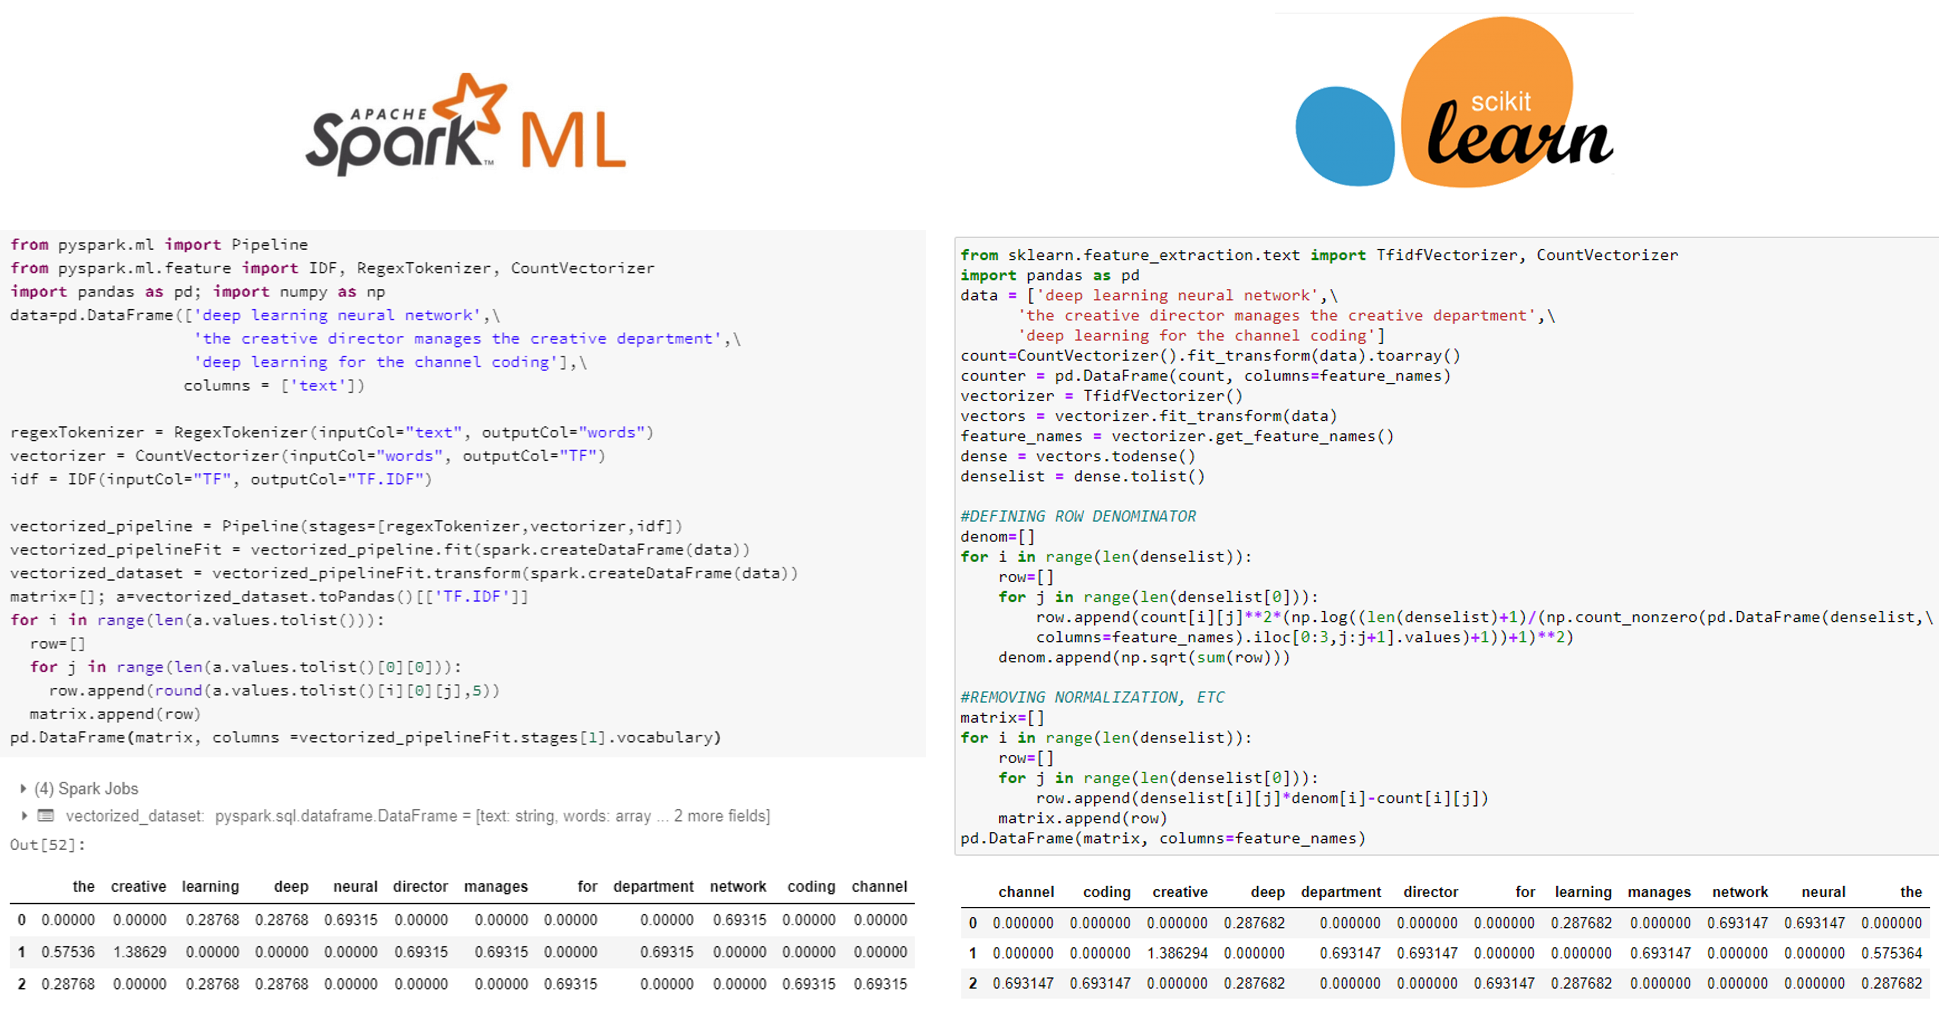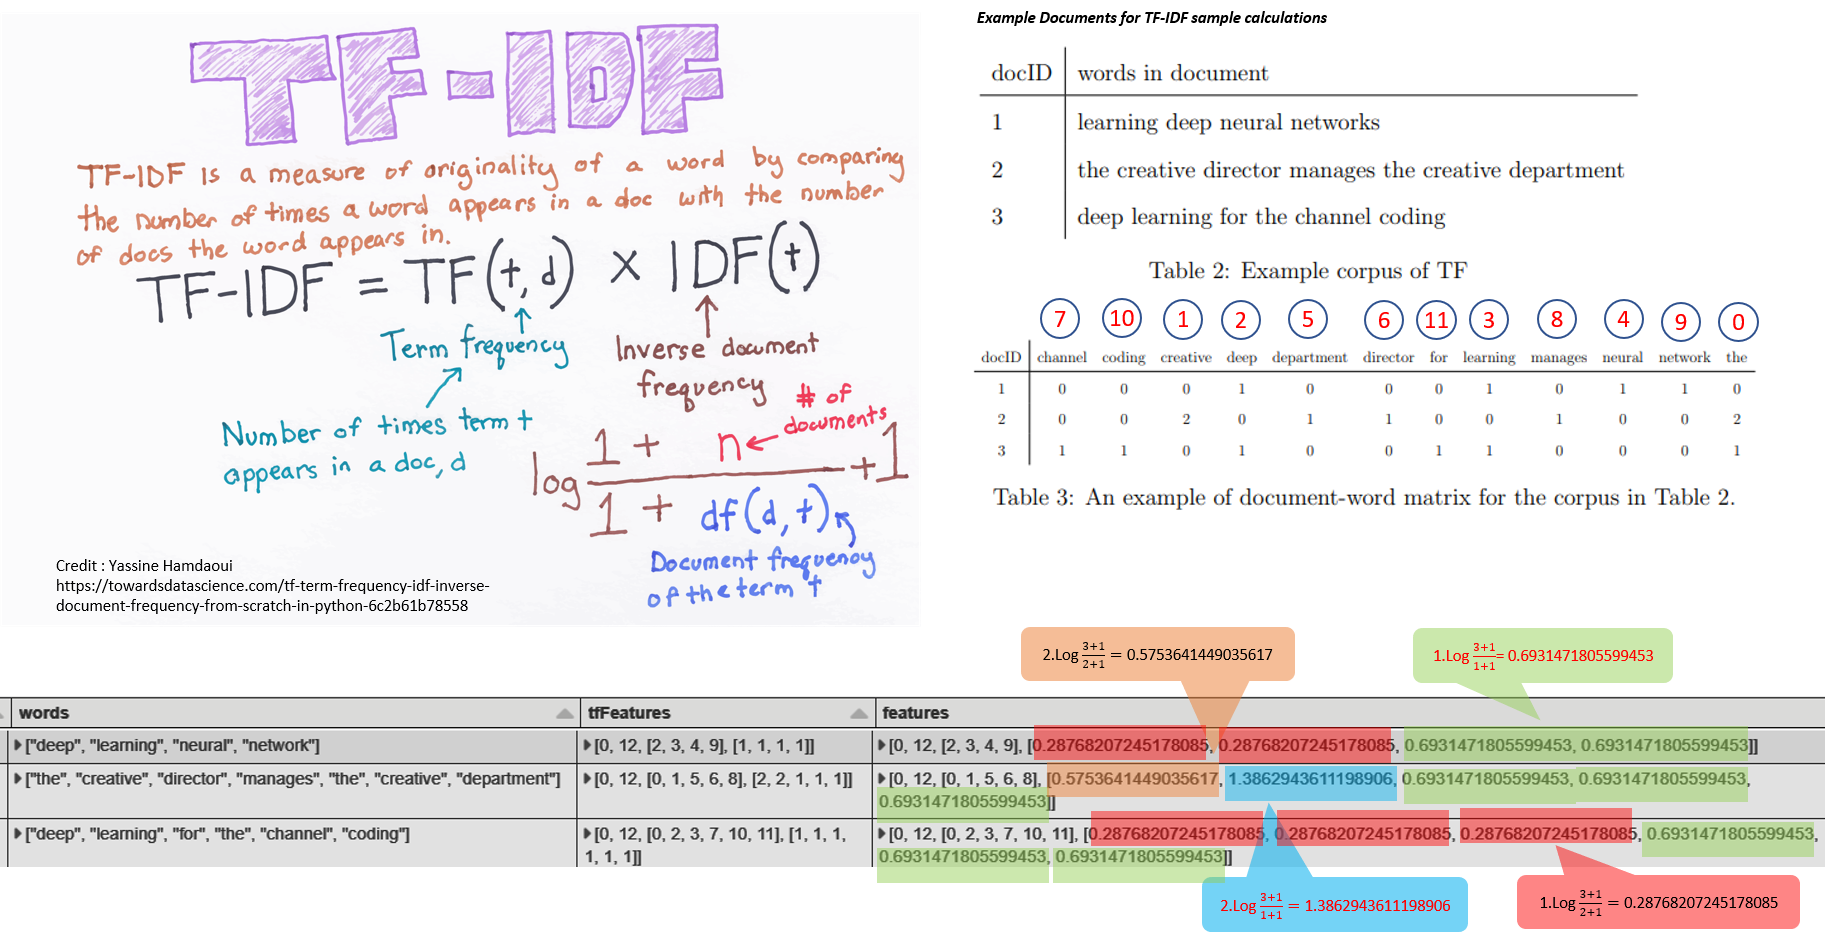

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

data = ['deep learning neural network',\
      'the creative director manages the creative department',\
      'deep learning for the channel coding']
count=CountVectorizer().fit_transform(data).toarray()
vectorizer = TfidfVectorizer()

feature_names = vectorizer.fit(data).get_feature_names()
counter = pd.DataFrame(count, columns=feature_names)
vectors = vectorizer.fit_transform(data)
dense = vectors.todense()
denselist = dense.tolist()

#DEFINING ROW DENOMINATOR
denom=[]
for i in range(len(denselist)):
    row=[]
    for j in range(len(denselist[0])):
        row.append(count[i][j]**2*(np.log((len(denselist)+1)/\
                    (np.count_nonzero(pd.DataFrame(denselist,\
        columns=feature_names).iloc[0:3,j:j+1].values)+1))+1)**2)
    denom.append(np.sqrt(sum(row)))

#REMOVING NORMALIZATION, ETC    
matrix=[]
for i in range(len(denselist)):
    row=[]
    for j in range(len(denselist[0])):
        row.append(denselist[i][j]*denom[i]-count[i][j])
    matrix.append(row)
pd.DataFrame(matrix, columns=feature_names)

,channel,coding,creative,deep,department,director,for,learning,manages,network,neural,the
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.693147,0.000000
1,0.000000,0.000000,1.386294,0.000000,0.693147,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.575364
2,0.693147,0.693147,0.000000,0.287682,0.000000,0.000000,0.693147,0.287682,0.000000,0.000000,0.000000,0.287682


from pyspark.ml import Pipeline
from pyspark.ml.feature import IDF, RegexTokenizer, CountVectorizer
import pandas as pd; import numpy as np
data=pd.DataFrame(['deep learning neural network',\
                   'the creative director manages the creative department',\
                   'deep learning for the channel coding'],\
                  columns = ['text'])

regexTokenizer = RegexTokenizer(inputCol="text", outputCol="words")
vectorizer = CountVectorizer(inputCol="words", outputCol="TF")
idf = IDF(inputCol="TF", outputCol="TF.IDF")

vectorized_pipeline = Pipeline(stages=[regexTokenizer,vectorizer,idf])
vectorized_pipelineFit = vectorized_pipeline.fit(spark.createDataFrame(data))
vectorized_dataset = vectorized_pipelineFit.transform(spark.createDataFrame(data))
matrix=[]; a=vectorized_dataset.toPandas()[['TF.IDF']]
for i in range(len(a.values.tolist())):
  row=[]
  for j in range(len(a.values.tolist()[0][0])):
    row.append(round(a.values.tolist()[i][0][j],5))
  matrix.append(row)
pd.DataFrame(matrix, columns =vectorized_pipelineFit.stages[1].vocabulary)

